## Neural Network

#### Aim
Analyse and predict student admission into UCLA graduate school based on the following features of available student amission data:
* GRE Scores (Test)
* Scores (Grades)
* Class rank (1-4)

#### Task
The following are the key task from this notebook:
* One-hot encoding the data
* Scaling the data
* Writing the backpropagation step

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Upload the Data

In [2]:
students_data = pd.read_csv('student_data.csv')
students_data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
# data statistics
students_data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [4]:
students_data.nunique()

admit      2
gre       26
gpa      132
rank       4
dtype: int64

In [5]:
# scatter plot function
def plot_points(data):
    """
    plot two different scatter plot on the same axis
    """
    admitted = data[data['admit'] == 1]
    rejected = data[data['admit'] == 0]
    
    # scatter plot of those who got admitted
    plt.scatter(admitted['gre'], admitted['gpa'], color='green', label='Admitted', s=25, edgecolor = 'k')
    
    # scatter plot of those who got rejected
    plt.scatter(rejected['gre'], rejected['gpa'], color='red', label='Rejectted', s=25, edgecolor = 'k')
    
    # plot title
    plt.title("Relationship Between GPA and GRE Score")
    
    # x and y label
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
    plt.legend()

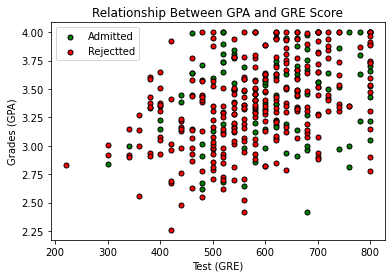

In [6]:
plot_points(students_data)
# plot title
plt.title("Relationship Between GPA and GRE Score")
plt.show()

The plot of those who are rejected accpeted based in rank

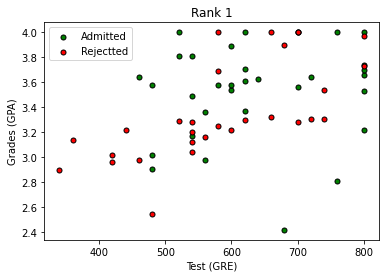

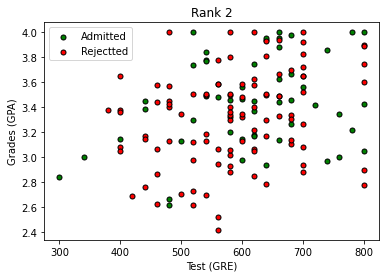

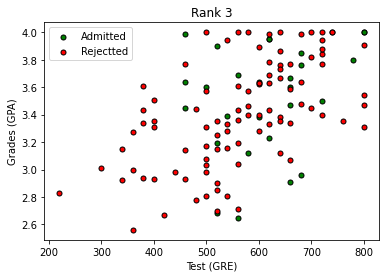

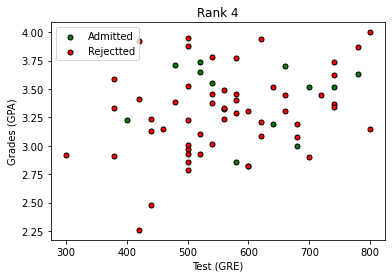

In [7]:
# Separating the ranks
data_rank1 = students_data[students_data["rank"]==1]
data_rank2 = students_data[students_data["rank"]==2]
data_rank3 = students_data[students_data["rank"]==3]
data_rank4 = students_data[students_data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

As can be seen from the four (4) plots repressenting the number of student who are rejected and accepted into UCL based on rank (ranks 1 being the lowest). We can then say that the lower the rank, the higher the acceptance rate of students.

### One-Hot Encode the Variable (Column)

In [8]:
# drop the first one to avoid multi-collinearity
one_hot_data = pd.concat([students_data, pd.get_dummies(students_data['rank'], prefix='rank')], axis=1)

# dropt the original rank column
one_hot_data.drop('rank', axis=1, inplace=True)

In [9]:
one_hot_data[:5]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


#### Scale the Data Features (grade and test score)

The next step is to scale the data. We notice that the `range for grades is 1.0-4.0`, whereas the `range for test scores is roughly 200-800`, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [10]:
one_hot_data.describe()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.317500,587.700000,3.389900,0.152500,0.377500,0.302500,0.167500
std,0.466087,115.516536,0.380567,0.359955,0.485369,0.459916,0.373889
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.395000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# make a copy of the data
processed_data = one_hot_data[:]

# scale the data
processed_data['gre'] = processed_data['gre'] / 800
processed_data['gpa'] = processed_data['gpa'] / 4

processed_data[:5]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


### Splitting the Data into Training and Testing Set

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [12]:
train_sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[train_sample], processed_data.drop(train_sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

Number of training samples is 360
Number of testing samples is 40


### Seperate the Target Variable from the Features (Predictors)

In [13]:
# train features and target
train_features = train_data.drop('admit', axis=1)
train_target = train_data['admit']

# test features and target
test_features = test_data.drop('admit', axis=1)
test_target = test_data['admit']

### Training a 2-Layer Neural Network

First we will write some helper function.

In [14]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

### Backpropagate the Error

Formula: $(y-\hat{y}) \sigma'(x)$

In [15]:
# Write the error term formula
def error_term_formula(x, y, output):
    return (y - output) * sigmoid_prime(x)